# cDC subtype analysis - mregDC marker comparison against other studies
Supplementary Figure 4
- Author: CW
- Files needed: 7_cDC_cells.rds, supplemental files from other studies
- Last updated: 04/11/24

In [80]:
library(Seurat)
library(ggplot2)

## load cDC object

In [65]:
obj.cDC <- readRDS('/net/bmc-lab5/data/kellis/group/scCancer2023/objects_for_DC_manuscript/for_public/7_cDC_cells.rds')

## 1. Maier et al. Nature 2020 markers - Supplementary Figure 4A-B

In [66]:
#CD300 --> CD300A 
nature_markers_4A <- c('MARCKSL1', 'CD80', 'TRAF1','RELB','CCL2',
                       'BIRC2', 'IL12B', 'ENO3', 'LAMP3', 'MARCKS',
                       'FSCN1', 'CD274', 'PDCD1LG2', 'CD300A', 'FAS',
                       'SCOCS2', 'CCL17', 'IL4I1', 'CCL19', 'BIRC3',
                       'CCR7', 'ISO1','NAAA','C1orf54','DNASE1L3','CLEC9A',
                       'XCR1','IRF8','IRF4','SIRPA','CD1C','CD1E','FCER1A',
                       'FCGR2B','CLEC10A')

In [78]:
#reorder idents so mDC is first
Idents(obj.cDC) <- factor(Idents(obj.cDC),levels=c("mregDC", "cDC1", "cDC2"))

Centering and scaling data matrix

Warning message in DoHeatmap(obj.cDC, features = nature_markers_4A, assay = "RNA", :
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: ISO1, SCOCS2”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Saving 9 x 6.67 in image


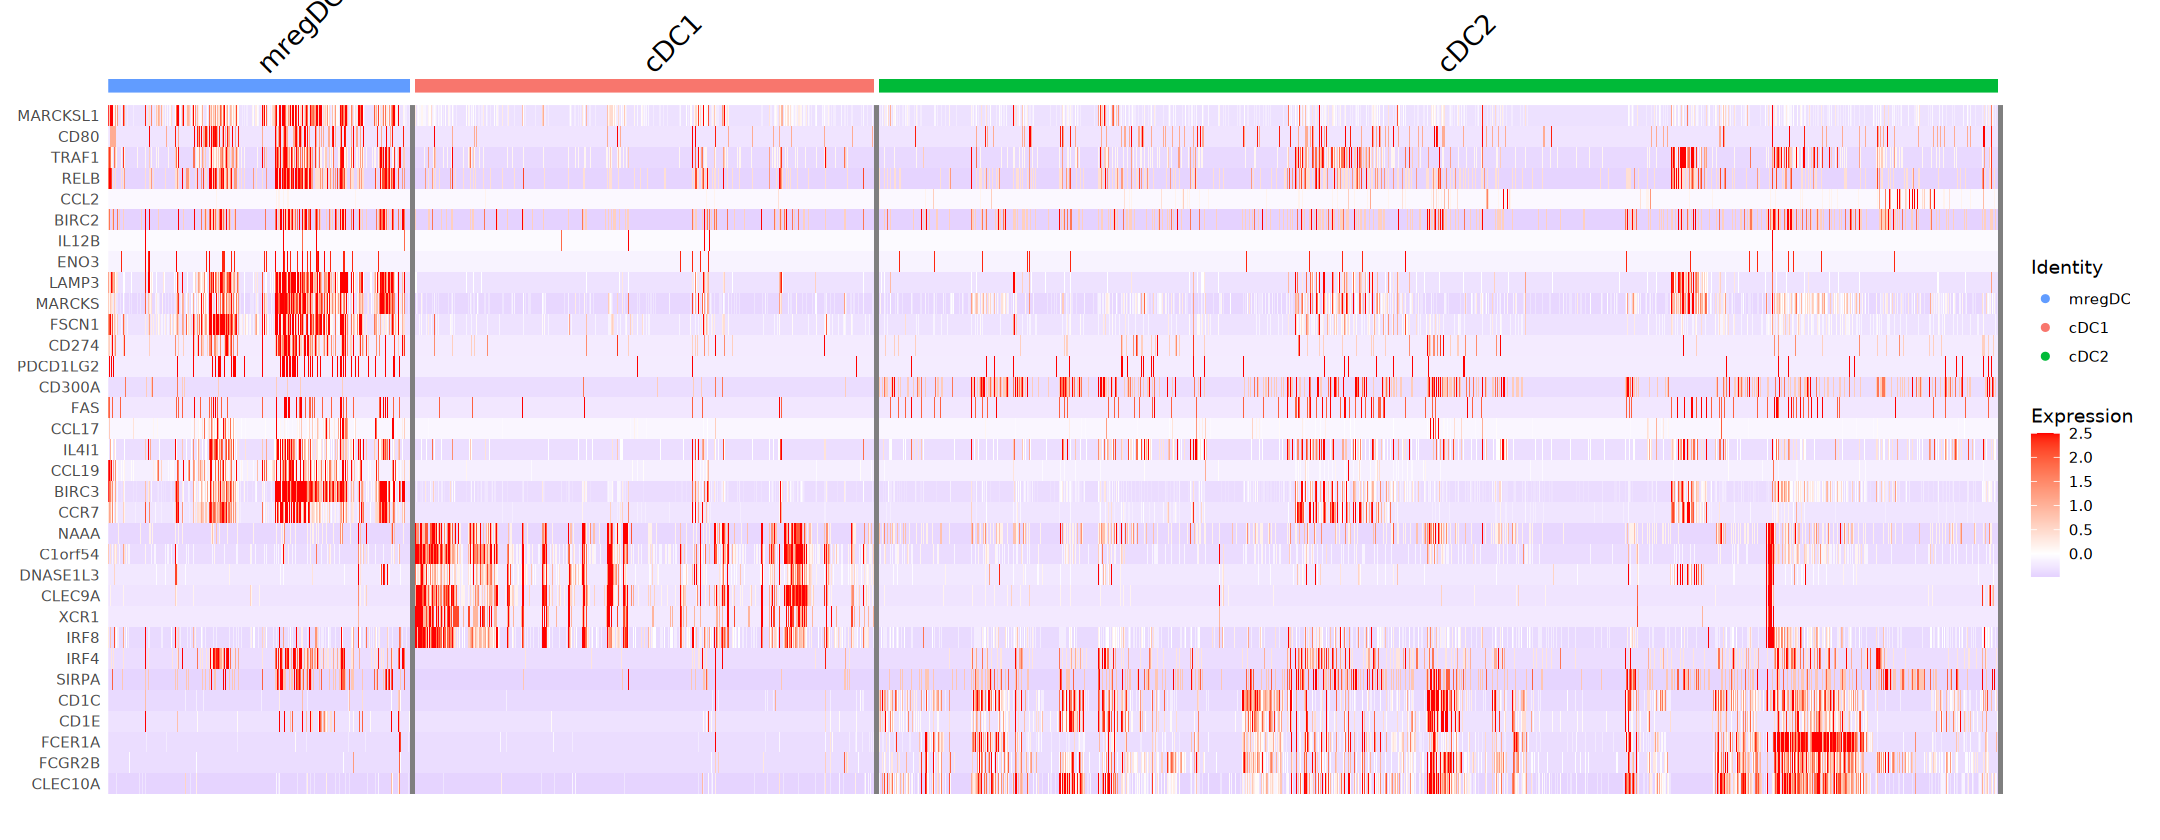

In [79]:
#SUPPLEMENTARY FIGURE 4A
options(repr.plot.height =7, repr.plot.width = 18)
DefaultAssay(obj.cDC) <- 'RNA'
obj.cDC <- ScaleData(object = obj.cDC, features = rownames(obj.cDC))
DoHeatmap(obj.cDC, features = nature_markers_4A, assay = 'RNA', 
         group.colors = c('#619CFF', '#F8766D','#00BA38'), slot = 'scale.data') + scale_fill_gradient2(low='blue', mid = 'white',
                                                                                                   high = 'red',                                                                                 midpoint = 0)

In [15]:
###SUPPLEMENTARY FIGURE 4B

#### 1. maturation markers 

In [34]:
scaling_factor = 6/5

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


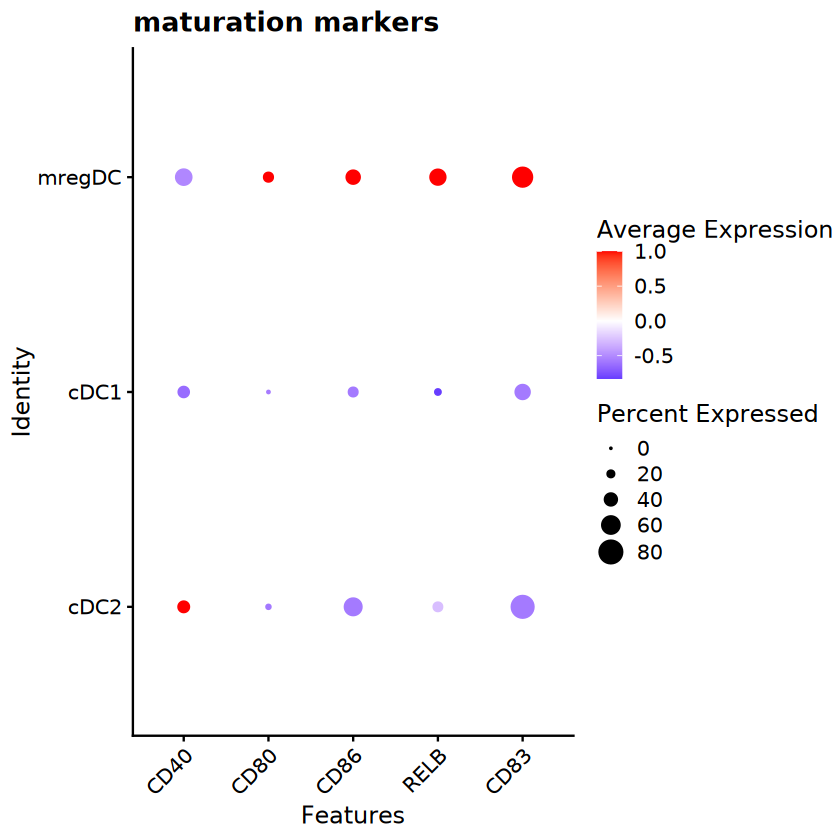

In [71]:
maturation.markers <- c('CD40', 'CD80', 'CD86', 'RELB', 'CD83')

options(repr.plot.height =7, repr.plot.width = 7)

Idents(obj.cDC) <- factor(Idents(obj.cDC),levels=c("cDC2", "cDC1", "mregDC"))
DotPlot(obj.cDC, features = maturation.markers, assay = 'RNA',scale.min = 0, scale.max = 80, 
       col.min = -1, col.max = 1) + 
                    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
                        labs(title = 'maturation markers') + 
                        scale_colour_gradient2(low='blue', mid = 'white',high = 'red',midpoint = 0) 

### 2. regulatory markers 

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


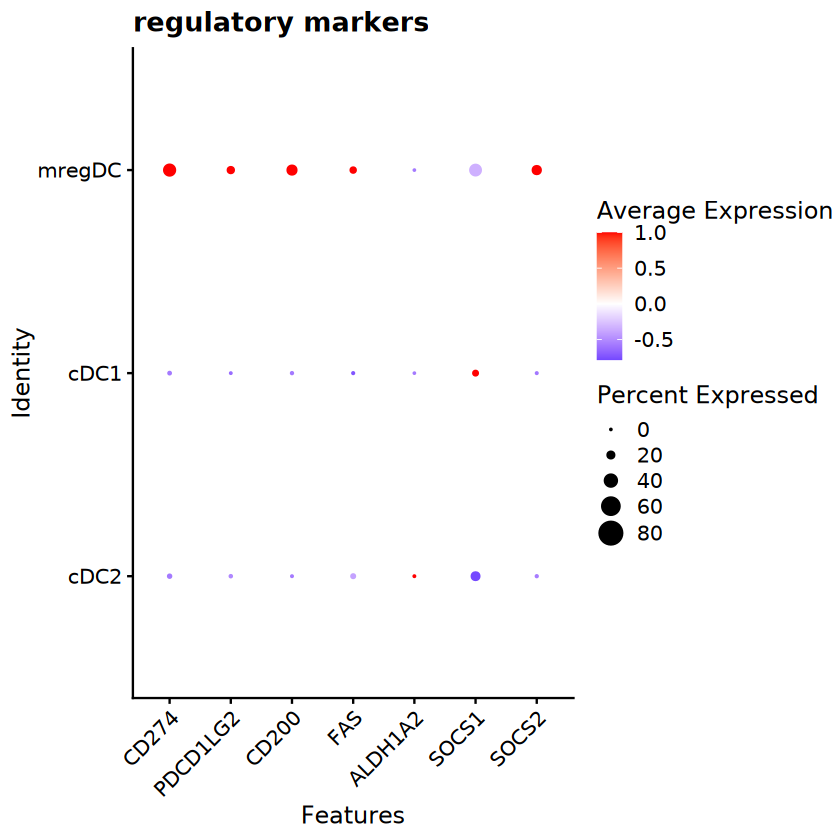

In [72]:
regulatory.markers <- c('CD274', 'PDCD1LG2', 'CD200', 'FAS', 'ALDH1A2', 
                        'SOCS1', 'SOCS2')

options(repr.plot.height =7, repr.plot.width = 7)

#DoHeatmap(updated_obj, features = regulatory.markers, assay = 'SCT')
DotPlot(obj.cDC, features = regulatory.markers, assay = 'RNA', scale.min = 0, scale.max = 80, 
       col.min = -1, col.max = 1) + 
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        labs(title = 'regulatory markers')+
        scale_colour_gradient2(low='blue', mid = 'white',high = 'red',midpoint = 0) 


Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


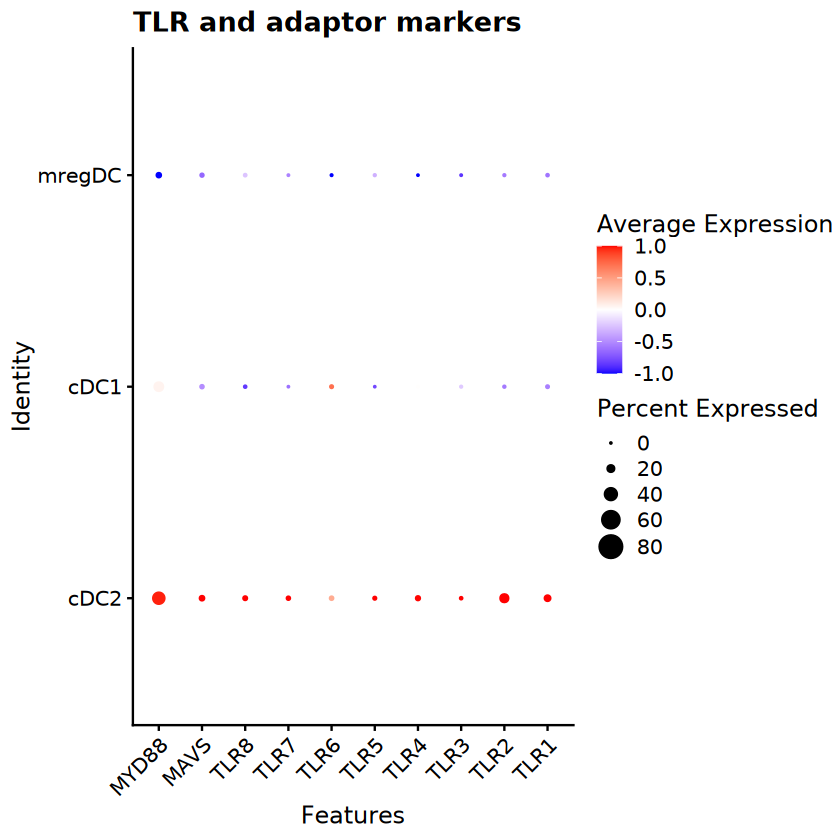

In [74]:
#TRL and adaptor markers 
TRL_adaptors <- c('MYD88', 'MAVS',  'TLR8', 'TLR7', 'TLR6', 'TLR5', 'TLR4', 'TLR3', 'TLR2', 'TLR1') 
#'TLR9',
options(repr.plot.height =7, repr.plot.width = 7)

#DoHeatmap(updated_obj, features = TRL_adaptors, assay = 'SCT')
DotPlot(obj.cDC, features = TRL_adaptors, assay = 'RNA', scale.min = 0, scale.max = 80, 
       col.min = -1, col.max = 1) + 
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + 
        labs(title = 'TLR and adaptor markers') + 
        scale_colour_gradient2(low='blue', mid = 'white',high = 'red',midpoint = 0) 

### 3. migration markers

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


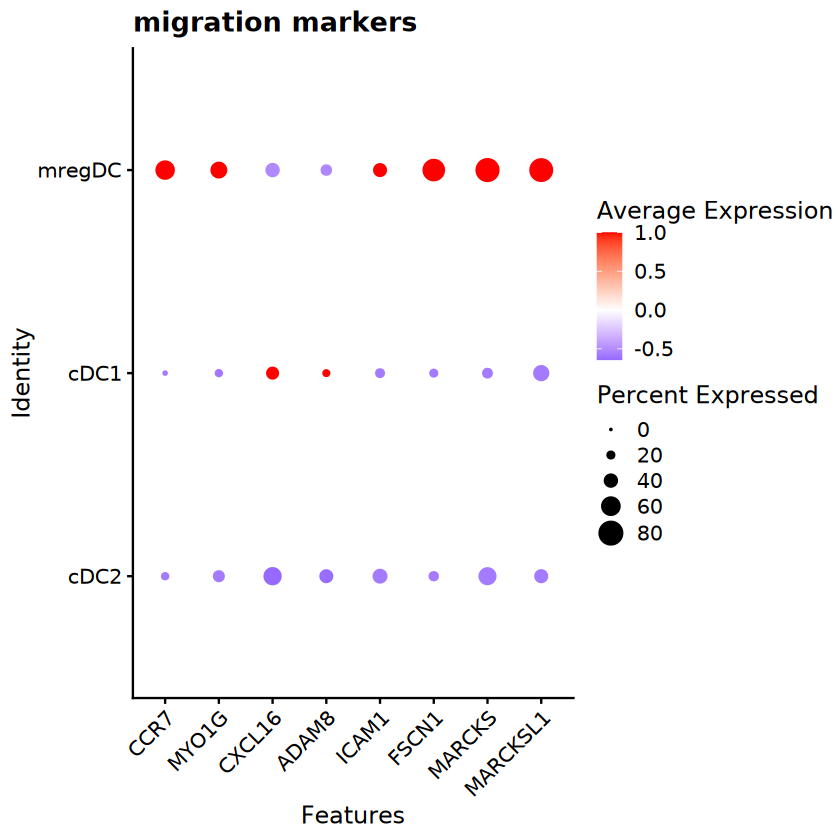

In [75]:
migration<- c('CCR7', 'MYO1G', 'CXCL16', 'ADAM8', 'ICAM1', 'FSCN1', 'MARCKS', 'MARCKSL1')

options(repr.plot.height =7, repr.plot.width = 7)

#DoHeatmap(updated_obj, features = migration, assay = 'SCT')
DotPlot(obj.cDC, features = migration, assay = 'RNA', 
        scale.min = 0, scale.max = 80, 
       col.min = -1, col.max = 1) + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
        labs(title = 'migration markers') +
        scale_colour_gradient2(low='blue', mid = 'white',high = 'red',midpoint = 0) 

### 4. TH2 response markers 

Warning message:
“The following requested variables were not found: ILR4”
Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


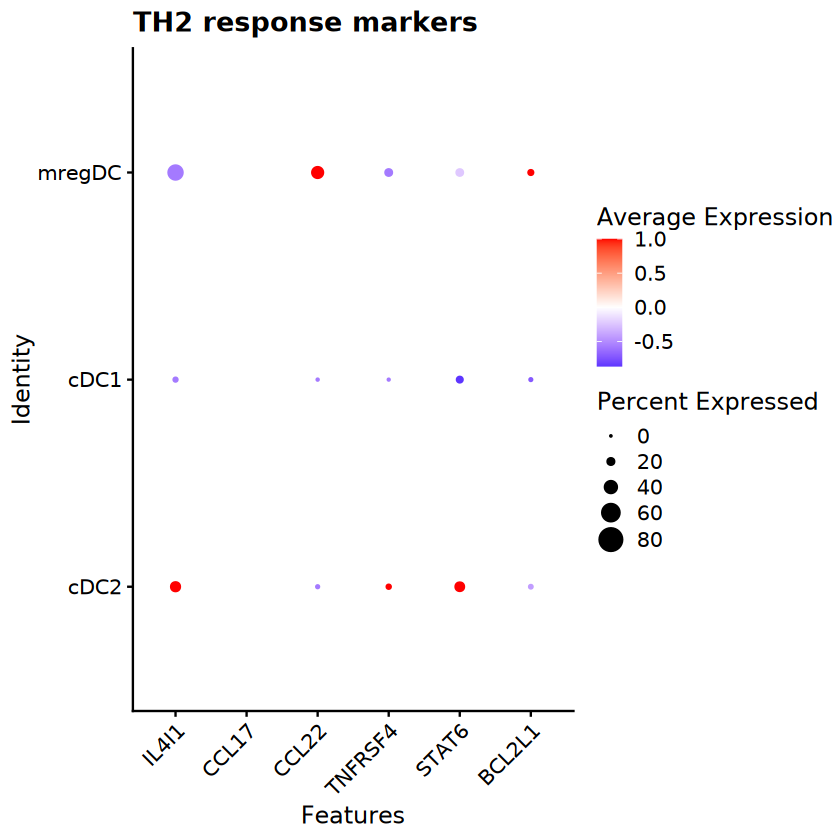

In [76]:
Th2_response <- c('ILR4', 'IL4I1', 'CCL17', 'CCL22', 'TNFRSF4', 'STAT6', 
                  'BCL2L1')

options(repr.plot.height =7, repr.plot.width = 7)

#DoHeatmap(updated_obj, features = Th2_response, assay = 'SCT')
DotPlot(obj.cDC, features = Th2_response, assay = 'RNA',  scale.min = 0, scale.max = 80, 
       col.min = -1, col.max = 1) + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+ 
        labs(title = 'TH2 response markers') +
        scale_colour_gradient2(low='blue', mid = 'white',high = 'red',midpoint = 0) 

## 2. Broz et al. Cell 2014 markers (https://doi.org/10.1016/j.ccell.2014.09.007) - Supplementary Figure 4C

In [88]:
library(pheatmap)

# load package for color range   
library(RColorBrewer)

In [86]:
# define range (e.g., -0.5 to 1) and step size (e.g., 0.2)
breaksList = seq(-0.6, 0.6, by = 0.1)

In [81]:
DefaultAssay(obj.cDC) <- 'RNA'

In [82]:
#save heatmap function
save_pheatmap_pdf <- function(x, filename, width=7, height=9) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
grid::grid.newpage()
grid::grid.draw(x$gtable)
    dev.off()
}

### 1. Cross presenting markers

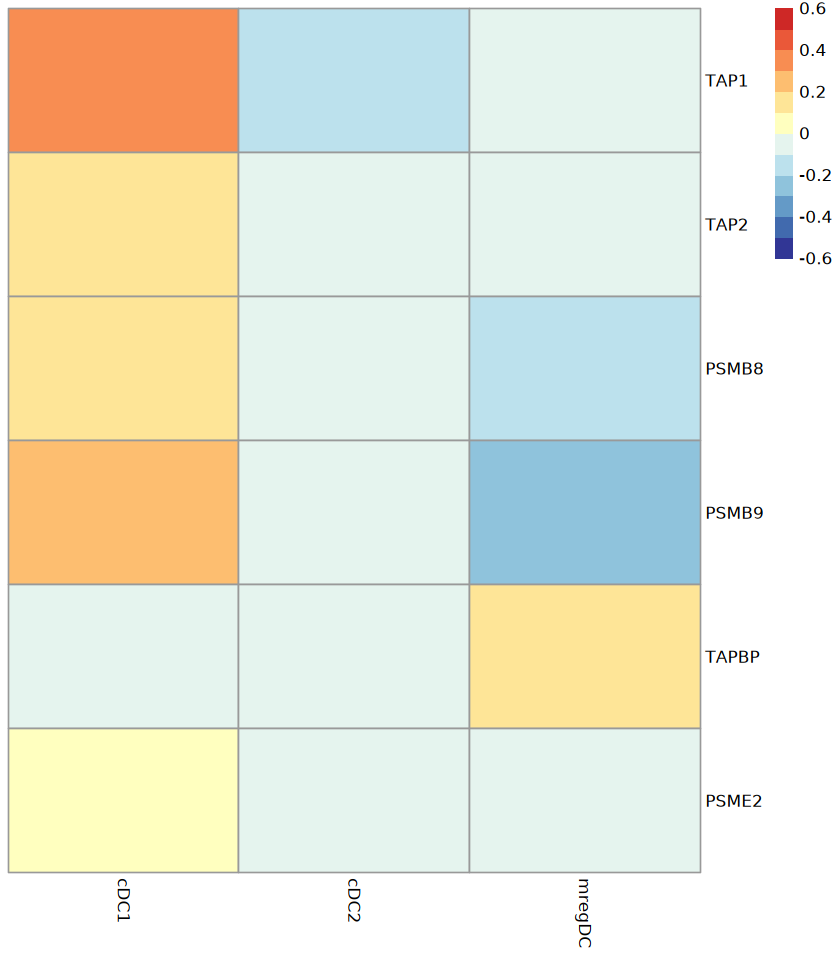

In [91]:
cross_presenting <- c("TAP1", "TAP2", "PSMB8", "PSMB9", "TAPBP", "PSME2")
#Average expression 
avgexp = AverageExpression(obj.cDC, assays = "RNA", features = cross_presenting, slot = "scale.data", group.by = 'cell_subtype')

options(repr.plot.width = 7, repr.plot.height = 8)
p <- pheatmap(avgexp$RNA, treeheight_row = 0, treeheight_col = 0, cluster_rows = F, cluster_cols = F, 
        color = colorRampPalette(rev(brewer.pal(n = 11, name = "RdYlBu")))(length(breaksList)),
         breaks = breaksList)

#save_pheatmap_pdf(p, "./SuppF4_Cell2014_cross_presenting.pdf", 
 #                width=800/72,height=1000/72)

### 2. costimulation markers
 - CD markers 
 - TIM3 co-inhibitory receptor found on T cells, macrophages, dendritic cells 
 - PDL2 - PD ligand 2

changes to gene names found in matrix: CD24a --> CD24, ICOSL --> ICOSLG, TIM3 -->  HAVCR2, PDL2 --> PDCD1LG2, RANK --> TNFRSF11A

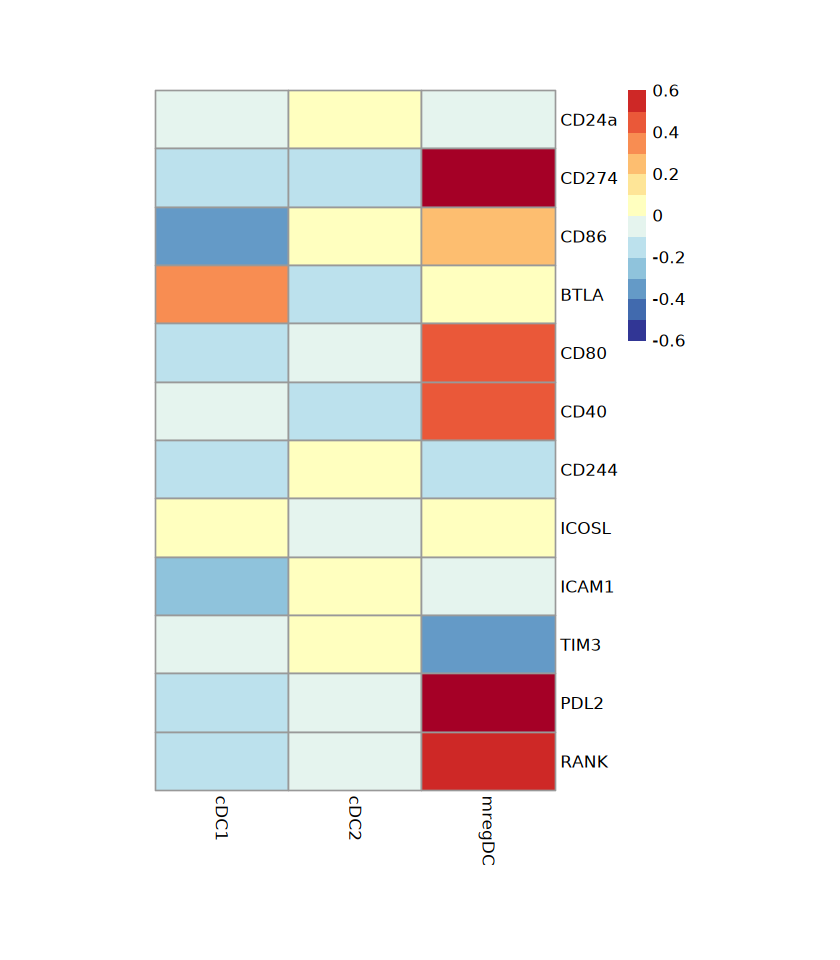

In [94]:

#markers 
costimulation <- c('CD24', 'CD274', 'CD86', 'BTLA', 'CD80', 'CD40', 'CD244', 'ICOSLG', 'ICAM1', 'HAVCR2', 'PDCD1LG2', 'TNFRSF11A')

#Average expression 
avgexp = AverageExpression(obj.cDC, assays = "RNA", features = costimulation, slot = "scale.data", group.by = 'cell_subtype')

library(pheatmap)

options(repr.plot.width = 7, repr.plot.height = 8)
p<- pheatmap(avgexp$RNA, treeheight_row = 0, treeheight_col = 0, cluster_rows= F, cluster_cols = F, 
         color = colorRampPalette(rev(brewer.pal(n = 11, name = "RdYlBu")))(length(breaksList)),
         breaks = breaksList, cellwidth = 80, cellheight = 35, 
        labels_row =  c('CD24a', 'CD274', 'CD86', 'BTLA', 'CD80', 'CD40', 'CD244', 'ICOSL', 'ICAM1', 'TIM3', 'PDL2', 'RANK'))

#save_pheatmap_pdf(p, "./SuppF4_Cell2014_costimulation.pdf", 
           #      width=700/72,height=1200/72)


### 3. Receptors
 - FLT3 - receptor tyrosine kinase, development and proliferation of stem cells and immune sytem
 - CSF - colony stimulating factor

Warning message:
“The following 1 features were not found in the RNA assay: CSF2RB2”


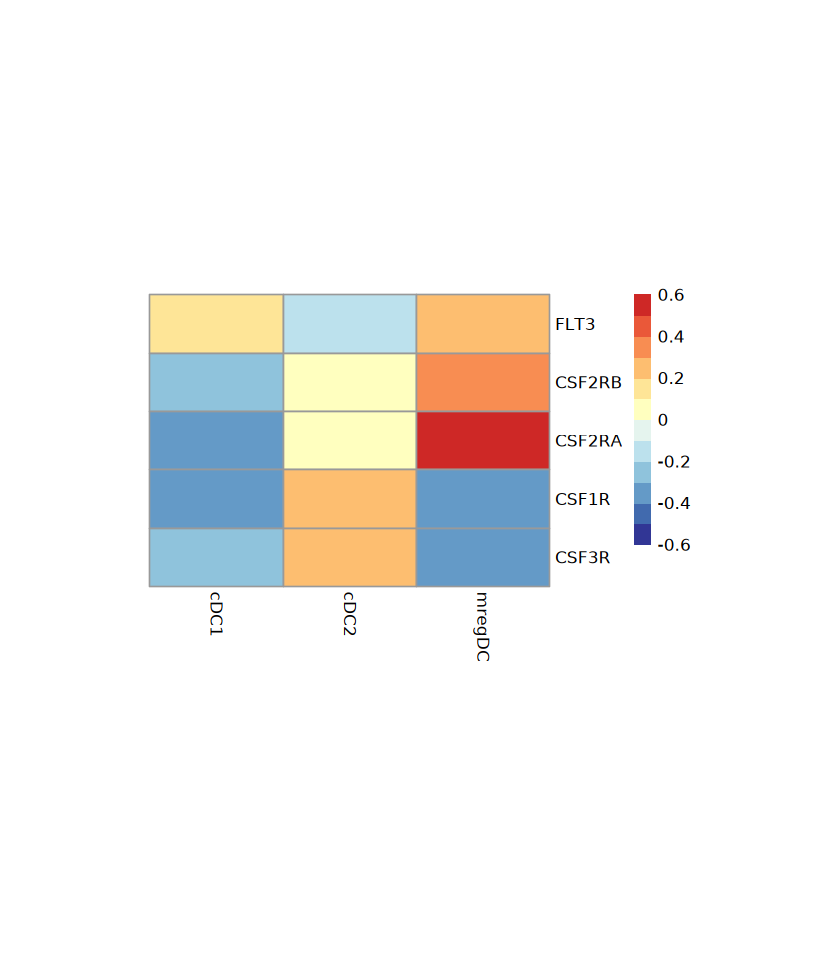

In [95]:
receptors <- c('FLT3', 'CSF2RB', 'CSF2RB2', 'CSF2RA', 'CSF1R', 'CSF3R')
#Average expression 
avgexp = AverageExpression(obj.cDC, assays = "RNA", features = receptors, slot = "scale.data", group.by = 'cell_subtype')

library(pheatmap)
p <- pheatmap(avgexp$RNA, treeheight_row = 0, treeheight_col = 0, cluster_rows = F, cluster_cols = F, 
        color = colorRampPalette(rev(brewer.pal(n = 11, name = "RdYlBu")))(length(breaksList)),
         breaks = breaksList, cellwidth = 80, cellheight = 35)

#save_pheatmap_pdf(p, "./SuppF4_Cell2014_receptors.pdf", 
     #            width=700/72,height=400/72)

### 4. Cytokines
 - IL12B
 - IL10: immunosuppresive cytokine

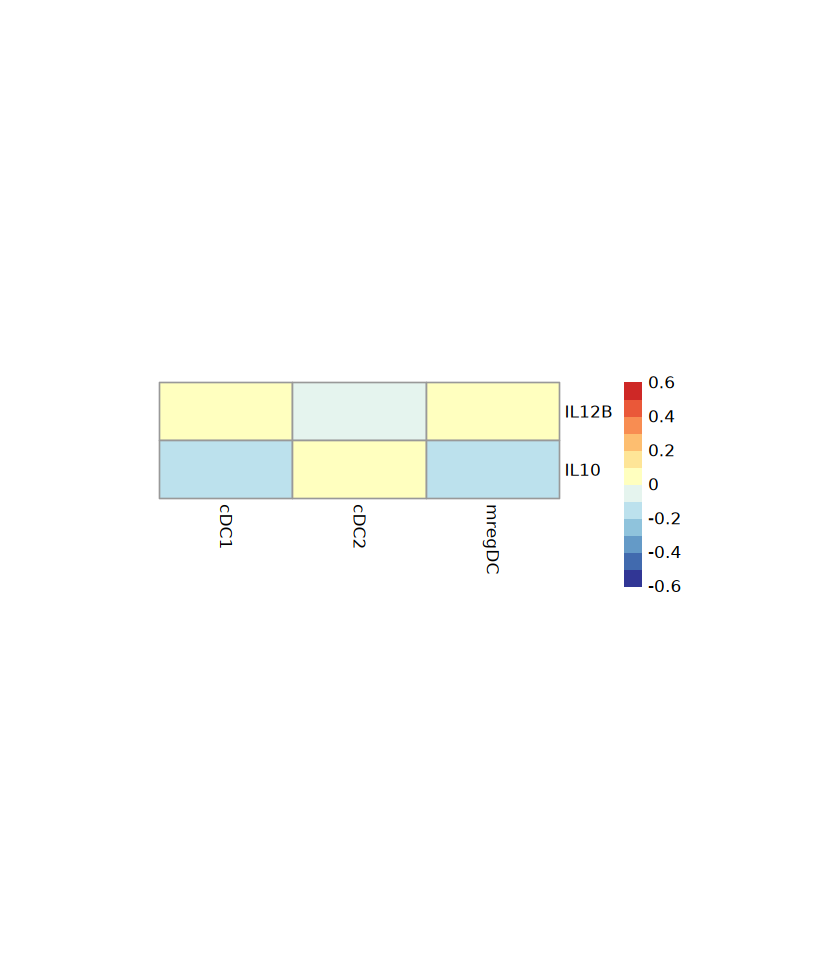

In [96]:
cytokines <- c('IL12B', 'IL10')

#Average expression 
avgexp = AverageExpression(obj.cDC, assays = "RNA", features = cytokines, slot = "scale.data", group.by = 'cell_subtype')

library(pheatmap)
p <- pheatmap(avgexp$RNA, treeheight_row = 0, treeheight_col = 0, cluster_rows = F, cluster_cols = F, 
         color = colorRampPalette(rev(brewer.pal(n = 11, name = "RdYlBu")))(length(breaksList)),
         breaks = breaksList, cellwidth = 80, cellheight = 35)


#save_pheatmap_pdf(p, "./SuppF4_Cell2014_cytokines.pdf", 
      #           width=700/72,height=400/72)

### 5. Chemokines and receptors
 - XCR1: cDC1 marker
 - CCR7: migration

Warning message:
“The following 1 features were not found in the RNA assay: CCL12”


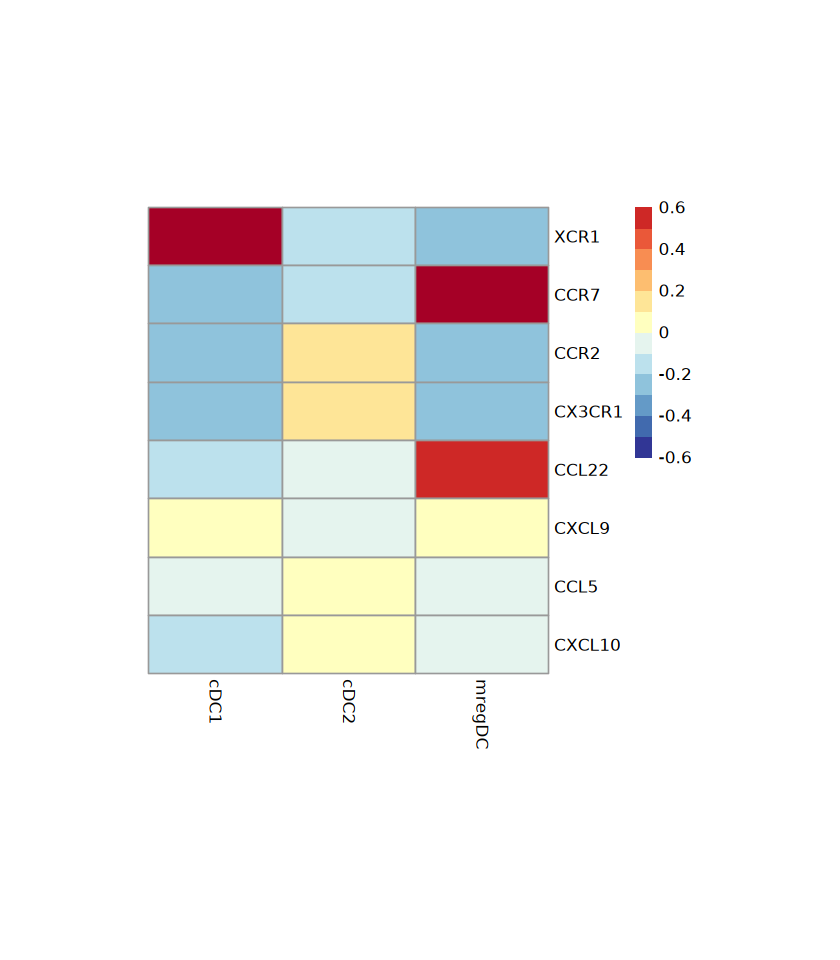

In [97]:
chemokines_receptors  <- c('XCR1', 'CCR7', 'CCR2', 'CX3CR1', 'CCL22', 'CXCL9', 'CCL5', 'CXCL10', 'CCL12')

#Average expression 
avgexp = AverageExpression(obj.cDC, assays = "RNA", features = chemokines_receptors, slot = "scale.data", group.by = 'cell_subtype')

library(pheatmap)
p <- pheatmap(avgexp$RNA, treeheight_row = 0, treeheight_col = 0, cluster_rows = F, cluster_cols = F, 
        color = colorRampPalette(rev(brewer.pal(n = 11, name = "RdYlBu")))(length(breaksList)),
         breaks = breaksList, cellwidth = 80, cellheight = 35)


#save_pheatmap_pdf(p, "./SuppF4_Cell2014_chemokine_receptor.pdf", 
           #      width=700/72,height=1000/72)

## 3. Zhivaki et al. Cell 2020 (https://doi.org/10.1016/j.celrep.2020.108381)
 refer to Supplemental Information https://ars.els-cdn.com/content/image/1-s2.0-S221112472031370X-mmc2.xlsx for list of genes used 

### 1. Module genes 

In [99]:
module_genes <- read.csv('./module_genes_cDC1.csv')

In [101]:
module_genes$X <- NULL
module_genes <- head(module_genes, 17)

In [102]:
module_genes$Gene.name <- unlist(lapply(module_genes$Gene.name, function(x) toupper(x)))

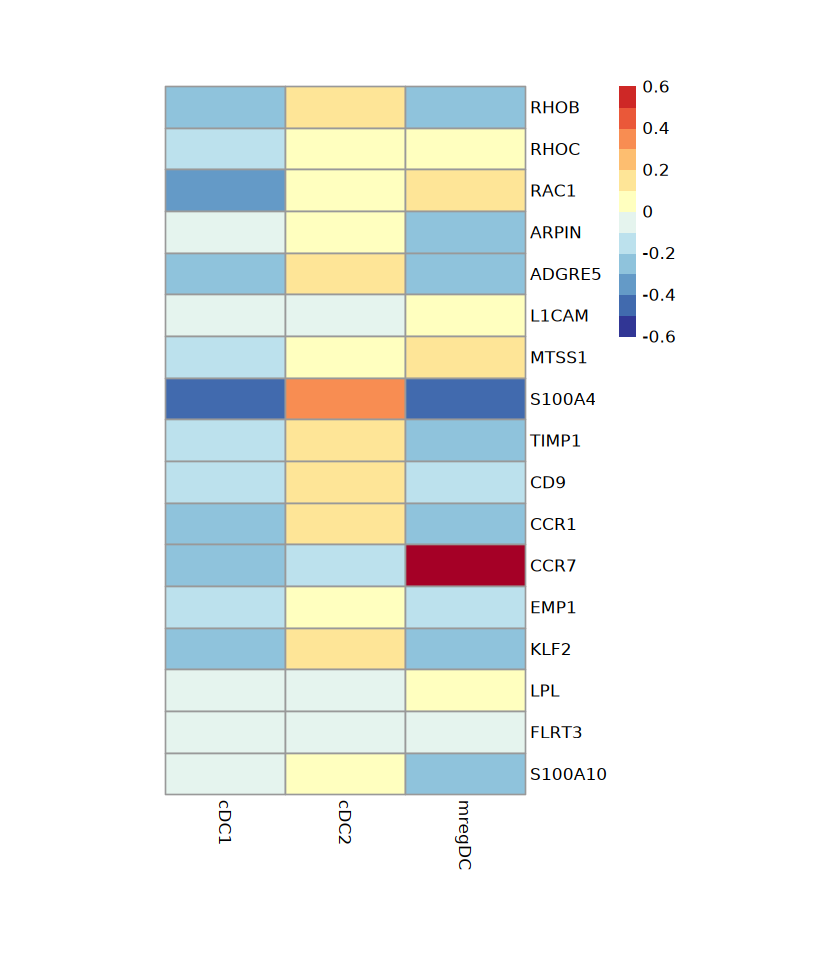

In [104]:
#Average expression 
avgexp = AverageExpression(obj.cDC, assays = "RNA", features = module_genes$Gene.name , slot = "scale.data", group.by = 'cell_subtype')

library(pheatmap)
p <- pheatmap(avgexp$RNA, treeheight_row = 0, treeheight_col = 0, cluster_rows = F, cluster_cols = F, 
        color = colorRampPalette(rev(brewer.pal(n = 11, name = "RdYlBu")))(length(breaksList)),
         breaks = breaksList, cellwidth = 72, cellheight = 25)


#save_pheatmap_pdf(p, "./SuppF4_Cell2020_module_genes.pdf", 
    #             width=700/72,height=1000/72)

### 2. T cell gene modules - positive regulation of T cell mediated cytotoxicity 

In [105]:
Tcell_mods <- read.csv('./inflammasomes_within_hyperactive_murine_dendritic_cells_Tcell.csv', 
                      check.names = FALSE)
#in spreadsheet, tab named "list of genes T cell Modules"

In [106]:
head(Tcell_mods)

,"GO:0001916, positive regulation of T cell mediated cytotoxicity","GO:0072683, T cell extravasation"
,<chr>,<chr>
1,Azgp1,Ccl2
2,B2m,Ccl5
3,Cd1d1,Ccr2
4,Cd1d1,Cd99
5,Cd1d2,Cd99
6,Cyrib,Cd99l2


In [107]:
pos_reg <- unlist(lapply(Tcell_mods[,1], function(x) toupper(x)))

In [108]:
pos_reg

[1] "AZGP1"    "B2M"      "CD1D1"    "CD1D1"    "CD1D2"    "CYRIB"   
 [7] "FADD"     "FCGRT"    "GM7030"   "GM8909"   "GM11127"  "H2-D1"   
[13] "H2-D1"    "H2-K1"    "H2-K1"    "H2-K1"    "H2-L"     "H2-M1"   
[19] "H2-M2"    "H2-M3"    "H2-M3"    "H2-M3"    "H2-M5"    "H2-M9"   
[25] "H2-M10.1" "H2-M10.2" "H2-M10.3" "H2-M10.4" "H2-M10.5" "H2-M10.6"
[31] "H2-M11"   "H2-Q1"    "H2-Q2"    "H2-Q4"    "H2-Q6"    "H2-Q7"   
[37] "H2-Q8"    "H2-Q9"    "H2-Q9"    "H2-Q10"   "H2-T3"    "H2-T22"  
[43] "H2-T23"   "H2-T23"   "H2-T23"   "H2-T24"   "HFE"      "HSPA8"   
[49] "IL12A"    "IL12B"    "IL23A"    "MILL1"    "MILL2"    "NECTIN2" 
[55] "NECTIN2"  "P2RX7"    "PNP"      "PTPRC"    "PVR"      "SLC22A13"
[61] "STX7"     "TAP2"     "TAP2"     "TAP2"     "XCL1"

In [109]:
all_symbols <- Tcell_mods[,1]

In [110]:
mouse_human <- read.csv('./idmap_mouse_human.csv')
#https://rdrr.io/cran/sigora/man/idmap.html

In [111]:
mouse_symbols <- append(mouse_human$symbol, c('Gm7030', 'Gm8909', 'Gm11127'))

In [112]:
all_symbols[!(all_symbols %in% mouse_symbols)]

[1] "Azgp1"    "B2m"      "Fadd"     "Fcgrt"    "Hfe"      "Hspa8"   
 [7] "Il12a"    "Il12b"    "Il23a"    "Nectin2"  "Nectin2"  "P2rx7"   
[13] "Pnp"      "Ptprc"    "Pvr"      "Slc22a13" "Stx7"     "Tap2"    
[19] "Tap2"     "Tap2"     "Xcl1"

In [113]:
filtered_symbols <- all_symbols[!all_symbols %in% mouse_symbols]
#add the symbols found from converter
library(nichenetr)
#convert_mouse_to_human_symbols(mouse_symbols, version = 1)
human_symbols <- convert_mouse_to_human_symbols(mouse_symbols, version = 2)
filtered_symbols <- append(filtered_symbols, unique(human_symbols[!is.na(human_symbols)]))

#sort lexigraphically and capitalize
filtered_symbols <- sort(filtered_symbols)
filtered_symbols <- unlist(lapply(filtered_symbols, function(x) toupper(x)))

In [114]:
filtered_symbols

[1] "AZGP1"    "B2M"      "CD1D"     "CYRIB"    "FADD"     "FCGRT"   
 [7] "HFE"      "HLA-A"    "HLA-E"    "HSPA8"    "IL12A"    "IL12B"   
[13] "IL23A"    "NECTIN2"  "NECTIN2"  "P2RX7"    "PNP"      "PTPRC"   
[19] "PVR"      "SLC22A13" "STX7"     "TAP2"     "TAP2"     "TAP2"    
[25] "XCL1"

Warning message:
“The following 1 features were not found in the RNA assay: CYRIB”


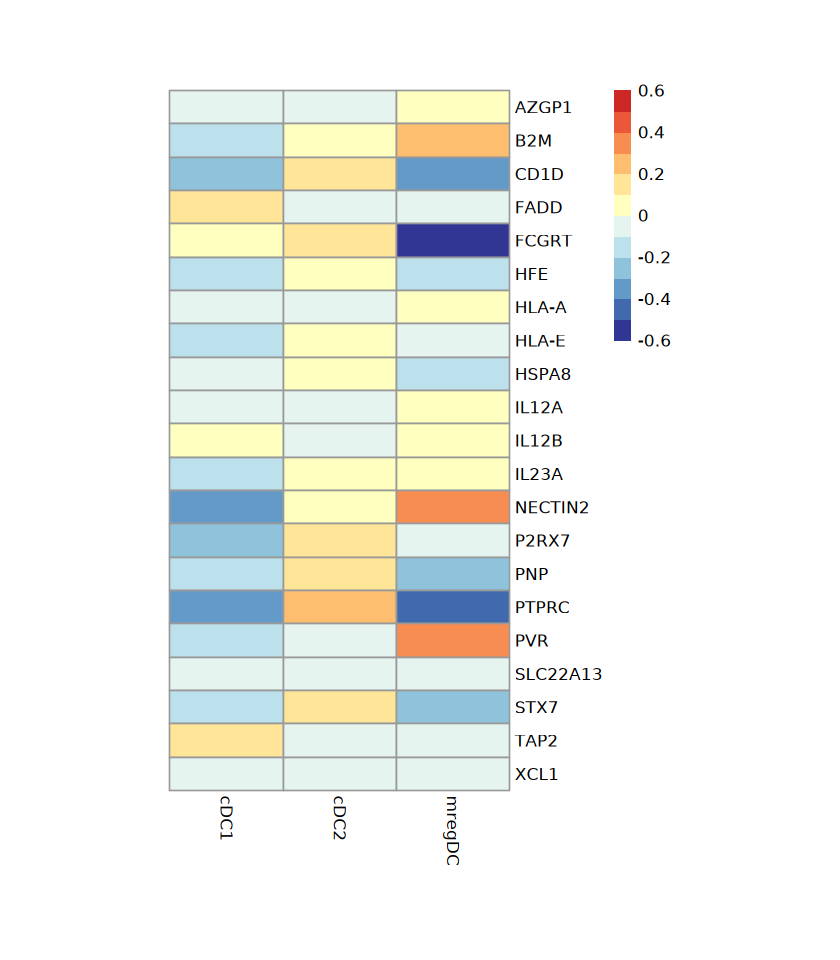

In [115]:
#Average expression 
avgexp = AverageExpression(obj.cDC, assays = "RNA", features = filtered_symbols, slot = "scale.data", group.by = 'cell_subtype')

library(pheatmap)
p <- pheatmap(avgexp$RNA, treeheight_row = 0, treeheight_col = 0, cluster_rows = F, cluster_cols = F, 
        color = colorRampPalette(rev(brewer.pal(n = 11, name = "RdYlBu")))(length(breaksList)),
         breaks = breaksList, cellwidth = 68, cellheight = 20)


#save_pheatmap_pdf(p, "./SuppF4_Cell2020_T_cell_GO0001916_pos_reg.pdf", 
      #           width=700/72,height=1000/72)

Mouse genes that could not be plotted: 
CD1D1, CD1D2, CYRIB, GM7030, GM8909, GM11127, H2-D1, H2-K1, H2-L, H2-M1, H2-M2, H2-M3, H2-M5, H2-M9, H2-M10.1, H2-M10.2, H2-M10.3, H2-M10.4, H2-M10.5, H2-M10.6, H2-M11, H2-Q1, H2-Q2, H2-Q4, H2-Q6, H2-Q7, H2-Q8, H2-Q9, H2-Q10, H2-T3, H2-T22, H2-T23, H2-T24, MILL1, MILL2”

### 3. T cell gene modules - T cell extravasation

In [116]:
extravasion <- unlist(lapply(Tcell_mods[1:15,2], function(x) toupper(x)))

In [117]:
extravasion

[1] "CCL2"   "CCL5"   "CCR2"   "CD99"   "CD99"   "CD99L2" "CRK"    "CRKL"  
 [9] "F11R"   "FADD"   "ICAM1"  "IL27RA" "ITGAL"  "MED23"  "RIPK3"

In [118]:
extravasion <- c('CCL2','CCL5','CCR2','CD99','CD99L2','CRK','CRKL','F11R','FADD','ICAM1','IL27RA','ITGAL','MED23','RIPK3')

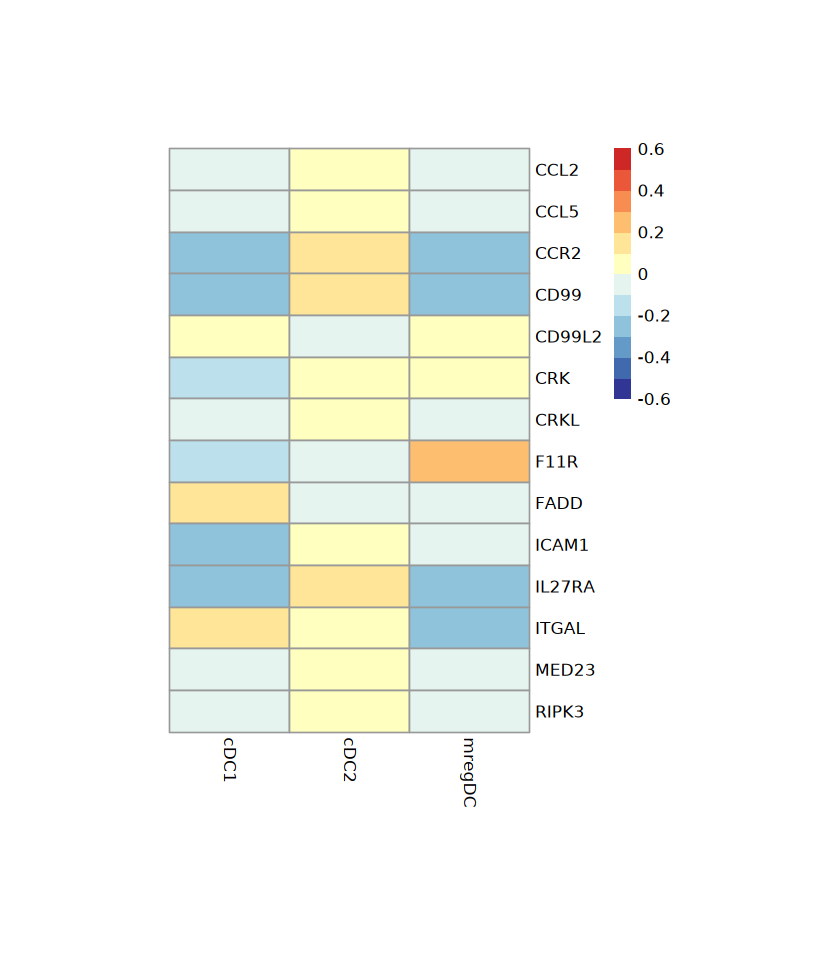

In [119]:
#Average expression 
avgexp = AverageExpression(obj.cDC, assays = "RNA", features = extravasion, slot = "scale.data", group.by = 'cell_subtype')

library(pheatmap)
p <- pheatmap(avgexp$RNA, treeheight_row = 0, treeheight_col = 0, cluster_rows = F, cluster_cols = F, 
        color = colorRampPalette(rev(brewer.pal(n = 11, name = "RdYlBu")))(length(breaksList)),
         breaks = breaksList, cellwidth = 72, cellheight = 25)


#save_pheatmap_pdf(p, "./SuppF4_Cell2020_T_cell_GO0072683_extravasion.pdf", 
    #             width=700/72,height=1000/72)

In [120]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /net/bmc-lab5/data/kellis/users/cbw3/conda/envs/r-kernel/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] nichenetr_2.0.4    pheatmap_1.0.12    RColorBrewer_1.1-3 ggplot2_3.5.0     
[5] SeuratObject_5.0.1 Seurat_4.3.0.1    

loaded via a namespace (and not attached):
  [1] utf8_1.2.4             spatstat.explore_3.2-7 reticulate_1.35.0     
  [4] tidyselect_1.2.1       htmlwidget